In [286]:
# Esports Statistics from 1998-2024
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import seaborn as sns

In [287]:
data = pd.read_csv("HistoricalEsportData.csv")


data["Earnings"] = pd.to_numeric(data["Earnings"], errors="coerce")
data["Players"] = pd.to_numeric(data["Players"], errors="coerce")
data["Tournaments"] = pd.to_numeric(data["Tournaments"], errors="coerce")

data["Date"] = pd.to_datetime(data["Date"], errors="coerce")

data["Game_numerical"] = pd.factorize(data["Game"])[0]






In [288]:
ge_data = pd.read_csv("GeneralEsportData.csv")

ge_data["Genre_number"] = pd.factorize(ge_data["Genre"])[0]




In [289]:

data["Genre"] = data["Game"].map(ge_data.set_index("Game")["Genre"])

print(data)

data.to_csv("new_data.csv", index = False)


            Date                                Game  Earnings  Players  \
0     1998-01-01        Command & Conquer: Red Alert   15000.0        8   
1     1998-01-01                          QuakeWorld   15000.0        8   
2     1998-05-01                            Quake II   15000.0        4   
3     1998-05-01                  Total Annihilation   15000.0        2   
4     1998-05-01                          QuakeWorld     300.0        3   
...          ...                                 ...       ...      ...   
10234 2024-10-01       Super Street Fighter II Turbo     340.0        3   
10235 2024-10-01               Skullgirls 2nd Encore     330.0        3   
10236 2024-10-01       StarCraft: Evo Complete (Mod)     308.0        4   
10237 2024-10-01            Melty Blood: Type Lumina     280.0        3   
10238 2024-10-01  Power Rangers: Battle for the Grid     200.0        3   

       Tournaments  Game_numerical                 Genre  
0                1               0      

In [290]:
summ_stats = data.describe()
print(summ_stats)



                                Date      Earnings       Players  \
count                          10239  1.023900e+04  10239.000000   
mean   2017-05-30 10:40:45.004395008  1.862778e+05     61.525051   
min              1998-01-01 00:00:00  0.000000e+00      0.000000   
25%              2014-06-01 00:00:00  1.206860e+03      6.000000   
50%              2018-10-01 00:00:00  1.175000e+04     17.000000   
75%              2021-07-01 00:00:00  7.756945e+04     53.000000   
max              2024-10-01 00:00:00  4.014065e+07   2134.000000   
std                              NaN  9.854799e+05    136.079728   

        Tournaments  Game_numerical  
count  10239.000000    10239.000000  
mean       6.565192      230.075007  
min        1.000000        0.000000  
25%        1.000000      113.000000  
50%        2.000000      208.000000  
75%        6.000000      337.000000  
max      172.000000      620.000000  
std       12.055580      156.523132  


In [291]:
data["Year"] = pd.to_datetime(data["Date"]).dt.year
summ_tournament = data.groupby("Year")["Tournaments"].describe()
print(summ_tournament)


      count      mean        std  min  25%  50%    75%    max
Year                                                         
1998   10.0  1.100000   0.316228  1.0  1.0  1.0   1.00    2.0
1999   10.0  1.600000   1.074968  1.0  1.0  1.0   1.75    4.0
2000   34.0  1.911765   1.464068  1.0  1.0  1.0   2.00    8.0
2001   38.0  1.710526   1.010964  1.0  1.0  1.0   2.00    5.0
2002   52.0  1.750000   1.384437  1.0  1.0  1.0   2.00    8.0
2003   83.0  2.481928   2.171666  1.0  1.0  2.0   3.00   12.0
2004   94.0  3.234043   3.230984  1.0  1.0  1.0   4.00   12.0
2005  132.0  2.924242   2.813873  1.0  1.0  2.0   3.00   11.0
2006  147.0  3.068027   3.234361  1.0  1.0  2.0   4.00   17.0
2007  184.0  3.184783   3.961369  1.0  1.0  1.0   3.00   23.0
2008  189.0  3.042328   3.223634  1.0  1.0  2.0   4.00   15.0
2009  177.0  3.858757   3.783539  1.0  1.0  2.0   6.00   16.0
2010  234.0  4.337607   7.192727  1.0  1.0  2.0   5.00   59.0
2011  265.0  6.467925  13.771124  1.0  1.0  3.0   5.00   80.0
2012  33

## reset_index återställer index

In [292]:
summ_money = data.groupby("Game")[["Earnings"]].sum().reset_index()
print(summ_money)

                         Game    Earnings
0                        ARMS    22759.90
1    Acceleration of SUGURI 2      410.00
2                     After-H    83863.40
3              Age of Empires   736284.75
4           Age of Empires II  3899608.73
..                        ...         ...
616                 eFootball   492000.00
617               iRacing.com  3757336.03
618                      osu!   279092.83
619                   rFactor    15083.56
620                 rFactor 2  2218753.12

[621 rows x 2 columns]


In [293]:
# vi kontrollerar om det finns null-värden
null_values = data.isnull().sum()

null_values

Date              0
Game              0
Earnings          0
Players           0
Tournaments       0
Game_numerical    0
Genre             0
Year              0
dtype: int64

(10.0, 50000000.0)

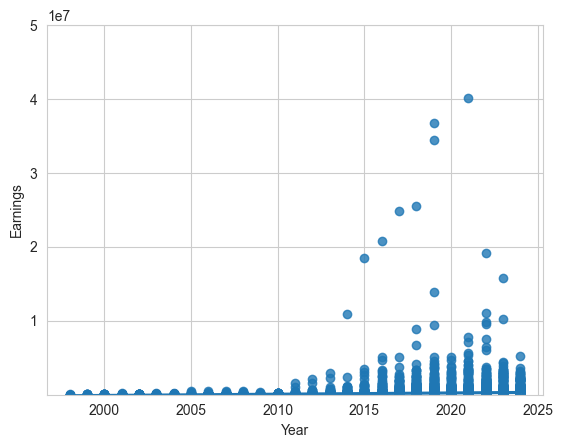

In [294]:
sns.set_style("whitegrid")
axes = sns.regplot(x=data.Year, y=data.Earnings)
axes.set_ylim(10, 50000000)


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

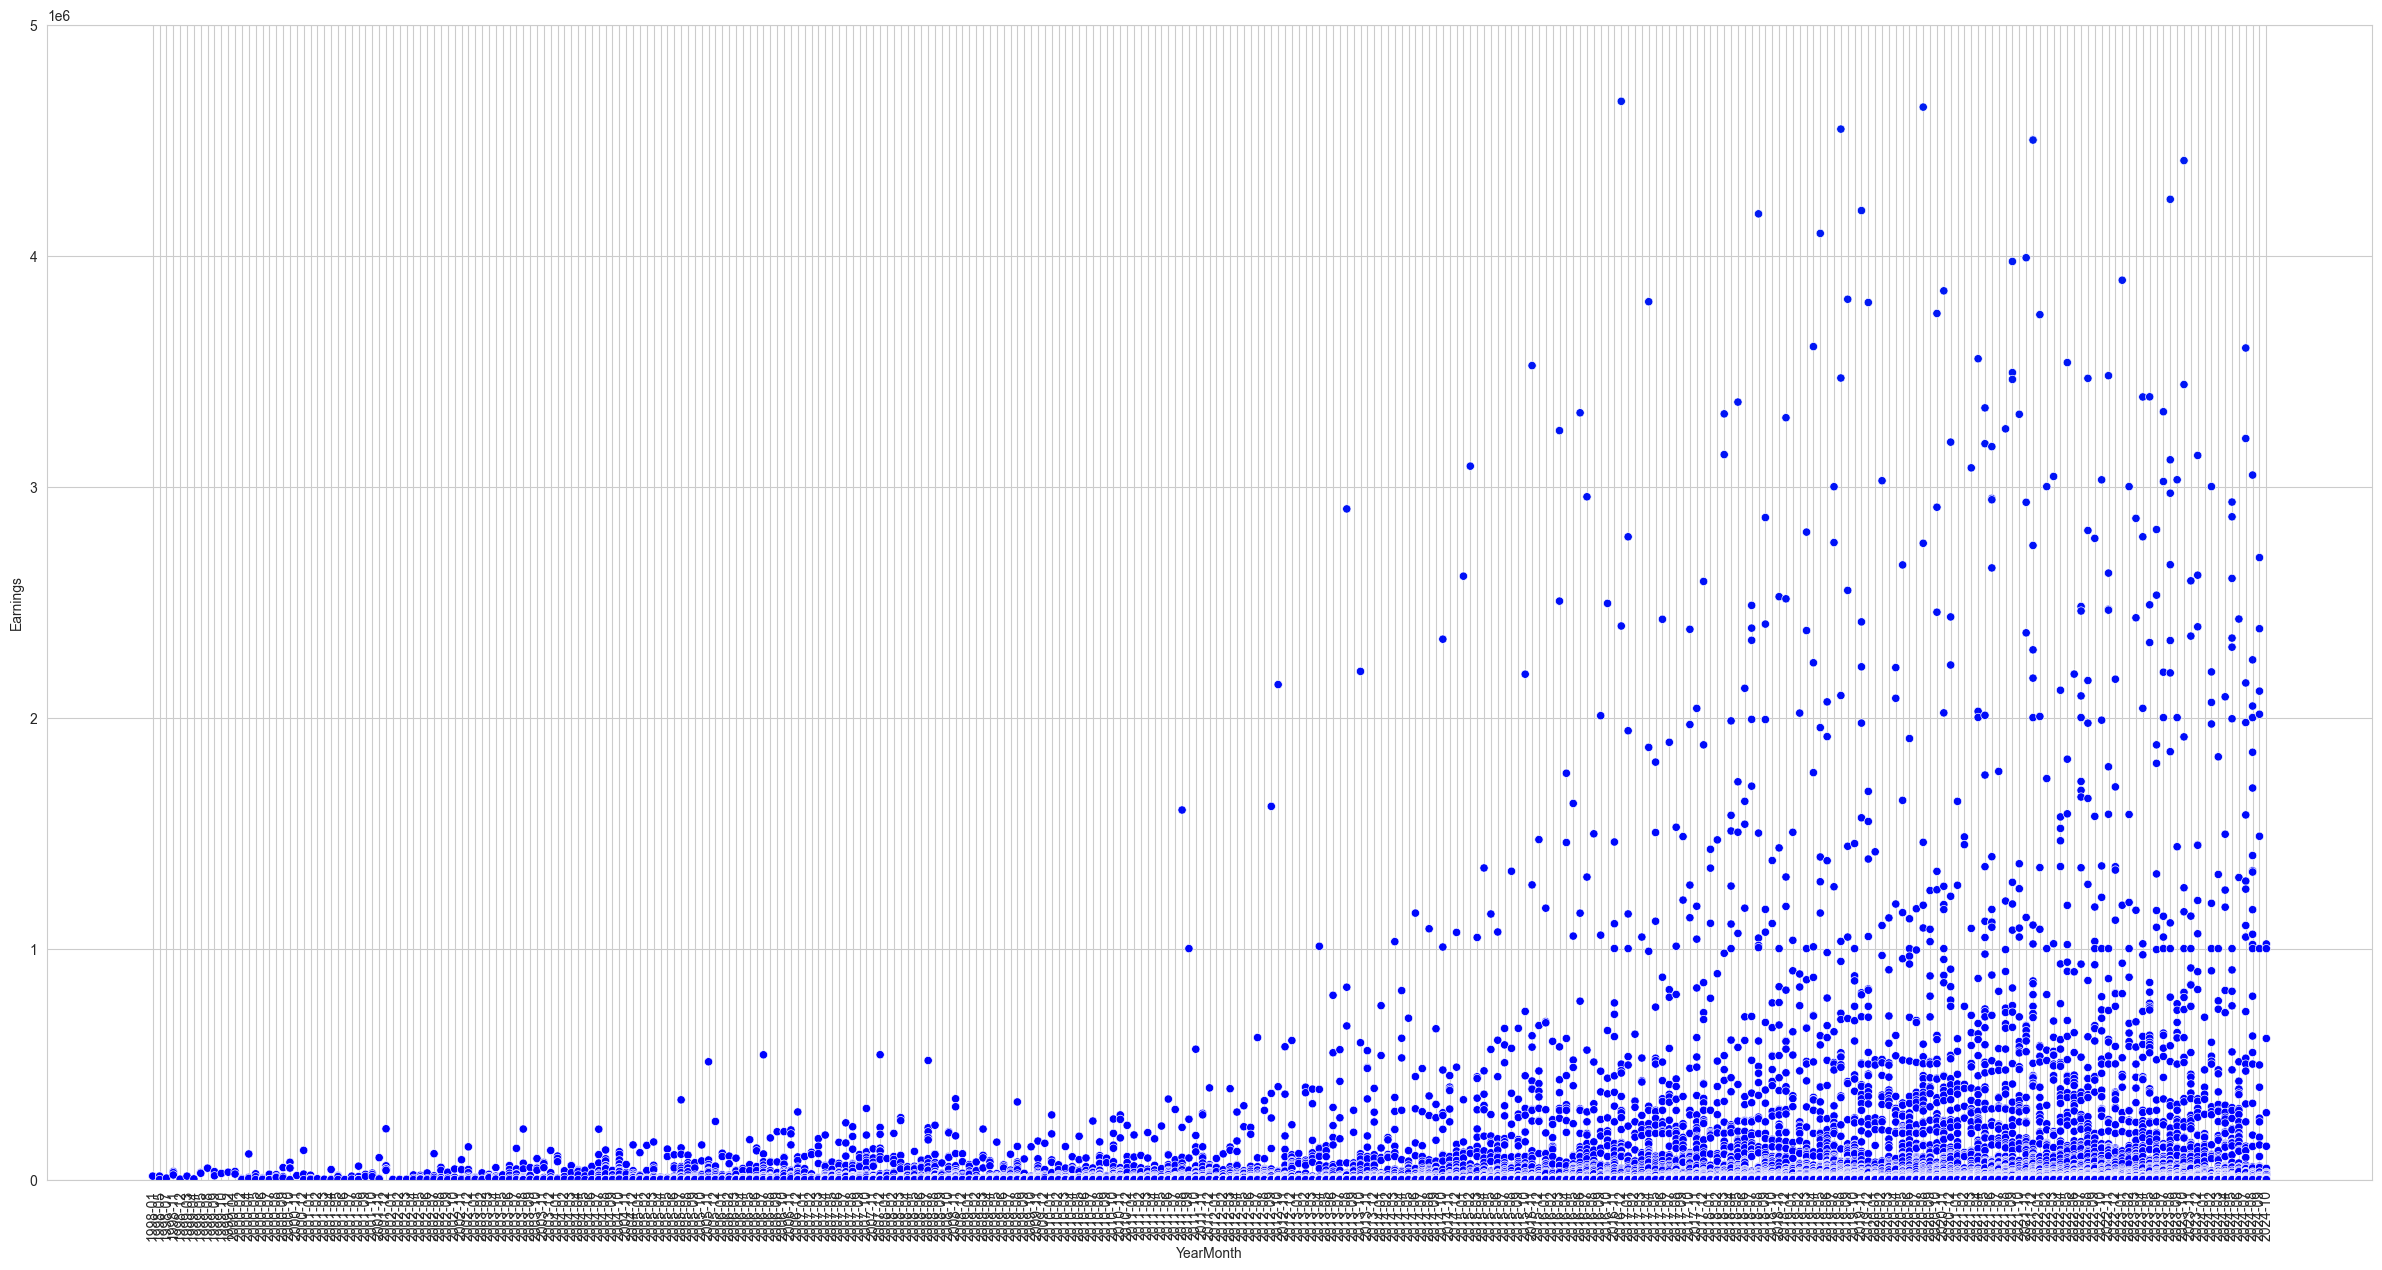

In [295]:
data["YearMonth"] = data["Date"].dt.strftime("%Y-%m")
plt.figure(figsize=(30, 15))
axes = sns.scatterplot(data=data, x="YearMonth", y="Earnings", hue="Earnings", palette = "winter", legend = False)
axes.set_ylim(0, 5000000)
plt.xticks(rotation=90)




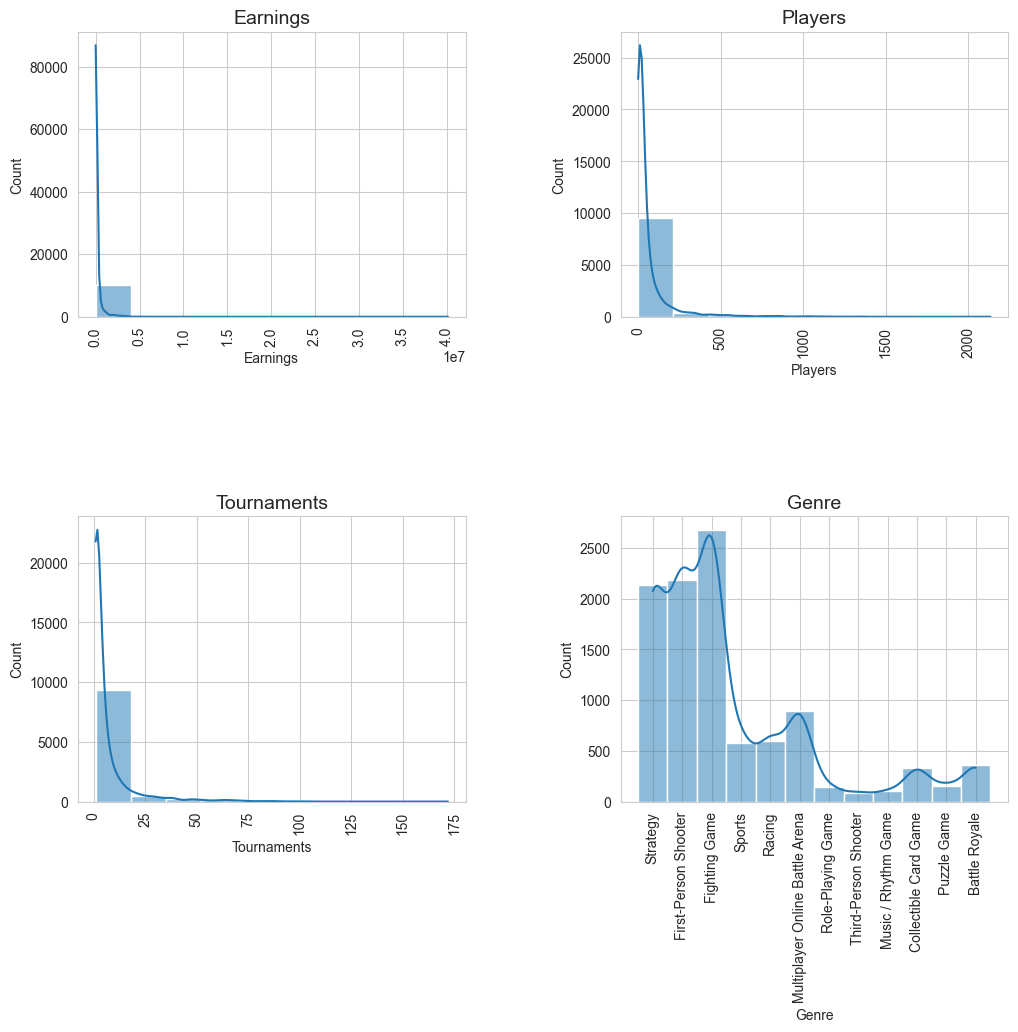

In [296]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.7, wspace=0.4)

columns_to_plot = [ "Earnings", "Players", "Tournaments", "Genre"]
for ax, col in zip(axes.flat, columns_to_plot):
    sns.histplot(data[col], bins=10, kde=True, ax=ax)
    ax.set_title(col, fontsize=14)
    ax.tick_params(axis="x", labelrotation=90, labelsize=10)





In [312]:
pivot = data.pivot_table(values="Earnings", index="Year", columns="Game", aggfunc="mean").fillna(0).round(2)
pivot

Game,ARMS,Acceleration of SUGURI 2,After-H,Age of Empires,Age of Empires II,Age of Empires III,Age of Empires IV,Age of Empires Online,Age of Mythology,Aim Gods,...,Zombieland VR: Headshot Fever,Zula,Zwift,chess24,chessarena.com,eFootball,iRacing.com,osu!,rFactor,rFactor 2
Year,,,,,,,,,,,,,,,,,,,,,
1998,0.00,0.0,0.00,2000.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
1999,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
2000,0.00,0.0,0.00,9500.00,12640.92,0.00,0.00,0.00,0.00,0.0,...,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
2001,0.00,0.0,0.00,0.00,20067.66,0.00,0.00,0.00,0.00,0.0,...,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
2002,0.00,0.0,0.00,100.00,8108.46,0.00,0.00,0.00,0.00,0.0,...,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
2003,0.00,0.0,0.00,625.00,2769.70,0.00,0.00,0.00,14882.20,0.0,...,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
2004,0.00,0.0,0.00,0.00,5695.65,0.00,0.00,0.00,3394.50,0.0,...,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
2005,0.00,0.0,0.00,0.00,4081.69,0.00,0.00,0.00,2250.00,0.0,...,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
2006,0.00,0.0,0.00,144.62,6333.14,1125.00,0.00,0.00,0.00,0.0,...,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
